# Conceptual

### 1. Describe the null hypotheses to which the p-values given in Table 3.4 correspond. Explain what conclusions you can draw based on these p-values. Your explanation should be phrased in terms of sales, TV, radio, and newspaper, rather than in terms of the coefficients of the linear model
- Null hypothesis states that a given coefficient is 0. The `p`-values are `<0.0001` (Intercept), `<0.0001` (TV), `<0.0001` (radio) and `0.8599` (newspaper). The conclusion is that there is evidence to reject the null hypothesis for the intercept, tv and radio coefficients, i.e. both tv and radio have an effect on sales. There isn't however evidence that `newspaper` budget has an effect on sales (`p` value high because of high <_estimated_> standard error of the coefficient).

### 2. Carefully explain the differences between the KNN classifier and KNN regression methods
- KNN stands for _K Nearest Neighbours_ - it's a method that assigns a response (for a test point `x`) based on `k` nearest neighbours (samples) of `x` based on some metric (e.g. Euclidean distance). KNN classifier will assign a majority class to a test sample `x`, whereas KNN regression model will assign an average response from all neighbours belonging to the neighbourhood of `x`. KNN method is non-parametric as it does not involve any parameters/form of the regression function or dicrimination boundary. It suffers from _Curse of dimensionality_ so it shouldn't be used when the number of predictors is high.

### 3. Suppose we have a data set with five predictors, $X_1 = GPA, X_2 = IQ, X_3 = Gender$ (1 for Female and 0 for Male), $X_4$ = Interaction between GPA and IQ, and $X_5$ = Interaction between GPA and Gender. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get $\hat{β}_0 = 50, \hat{β}_1 = 20, \hat{β}_2 = 0.07, \hat{β}_3 = 35, \hat{β}_4 = 0.01, \hat{β}_5 = −10$. 

(a) Which answer is correct, and why?
- iii. For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough.
- The model is $Y = \hat{β}_0X_1 + \hat{β}_1X_2 + \hat{β}_3X_3 + \hat{β}_4X_1X_2 + \hat{β}_5X_1X_3$. For males, $X_3 = 0 \implies Y_{males} = \hat{β}_0X_1 + \hat{β}_1X_2 + \hat{β}_4X_1X_2$ so the difference in salary (female - male) is $\hat{β}_3 + \hat{β}_5X_1$. For a $GPA > 3.5$ males earn more.

(b) Predict the salary of a female with IQ of 110 and a GPA of 4.0.

In [3]:
Y = 50 + 20 * 4 + 0.07 * 110 + 35 * 1 + 0.01 * (4 * 110) - 10 * (4 * 1)
print(Y, "k$")

137.1 k$


(c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.
- False. We don't know the (estimate) of the standard error for this coefficient and thus its p-value. It can be that the p-value is significant which would constitute an evidence against the null $H_0: \beta_4 = 0$. The size of a coefficient can still be significant if the corresponding p-value is small.

### 4. I collect a set of data (`n = 100` observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. $Y = β_0 + β_1X + β_2X^2 + β_3X^3 + ϵ$.

(a) Suppose that the true relationship between $X$ and $Y$ is linear, i.e. $Y = β_0 + β_1X + ϵ$. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.
- We'd expect (training) RSS for the cubic regression model to be lower than the RSS for the simple linear regression. This is because cubic model is more flexible - and it'd be equivalent to the linear model for $\beta_2 = 0, \beta_3 = 0$. Cubic regression coefficients have been found using least squares (i.e. minimising the squares of residuals) so they can not, by the very design, result in a higher RSS.

(b) Answer (a) using test rather than training RSS.
- We'd expect (test) RSS of a linear regression model to be lower than the RSS of a cubic regression. This is because the true underlying model is linear - one parameter conveys all the information there is to capture. Cubic model overfits to the training data by picking up noise ($\epsilon$).

(c) Suppose that the true relationship between $X$ and $Y$ is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.
- Training RSS for the cubic model will be lower than for the linear model. This is because its more flexible and, using least squares, it has more ability to fit to the training data to minimise the RSS. In an extreme case, high-order polynomial could "pass through" all of the training samples resulting in 0 training RSS.

(d) Answer (c) using test rather than training RSS.
- There is not enough information to tell which (test) RSS will be lower. This will depend on how nonlinear the true relationship is.

### 5. Consider the fitted values that result from performing linear regression without an intercept. In this setting, the ith fitted value takes the form
$$
\hat{y}_i = x_i \hat{\beta}
$$
where
$$
\hat{\beta} = \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i'=1}^{n} x_i'^2}
$$
Show that we can write
$$
\hat{y}_i = \sum_{i'=1}^{n} a_i' y_i'
$$
What is $a_i'$?

Answer:
$$
\hat{y}_i = x_i \hat{\beta} = 
x_i \frac{\sum_{j=1}^{n} x_j y_j}{\sum_{k=1}^{n} x_k^2} = 
\sum_{j=1}^{n} \frac{x_i x_j}{\sum_{k=1}^{n} x_k^2} y_j = 
\sum_{j=1}^{n} a_j y_j
$$
where
$$
a_j = \frac{x_i x_j}{\sum_{k=1}^{n} x_k^2}
$$

### 6. Using (3.4), argue that in the case of simple linear regression, the least squares line always passes through the point $(\bar{x}, \bar{y})$
- We know that, for simple linear regression $y = \hat{\beta}_0 + \hat{\beta}_1 x$. From (3.4) we have: $\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$. Substituting $x = \bar{x}$ into the simple linear regression equation we get:
$$
y(\bar{x}) = \hat{\beta}_0 + \hat{\beta}_1 \bar{x} \overset{(3.4)}{=} (\bar{y} - \hat{\beta}_1 \bar{x}) + \hat{\beta}_1 x = \bar{y}
$$
which proves that $y$ passes through $(\bar{x}, \bar{y})$


### 7. It is claimed in the text that in the case of simple linear regression of $Y$ onto $X$, the $R^2$ statistic (3.17) is equal to the square of the correlation between $X$ and $Y$ (3.18). Prove that this is the case. For simplicity, you may assume that $\bar{x} = \bar{y} = 0$
- We know that:
$$
R^2 = \frac{\sum (\hat{y}_i - \bar{y})^2}{\sum (y_i - \hat{y}_i)^2}, \quad \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}, \quad \hat{\beta}_1 = \frac{\sum (x_i - \bar{x}) (y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
$$
then:
$$
R^2 = \frac{\sum (\hat{\beta}_0 + \hat{\beta}_1 x_i - \bar{y})^2}{\sum (y_i - \hat{y}_i)^2} \\
= \frac{\sum (\bar{y} - \hat{\beta}_1 \bar{x} + \hat{\beta}_1 x_i - \bar{y})^2}{\sum (y_i - \hat{y}_i)^2} \\
= \frac{\hat{\beta}_1^2 \sum (  x_i - \bar{x}  )^2}{\sum (y_i - \hat{y}_i) ^2} \\ 
\overset{subst.  \hat{\beta}_1}{=} \frac{(\sum (x_i - \bar{x}) (y_i - \bar{y}))^2}{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2} \\
= \Bigl(  \frac{\sum (x_i - \bar{x}) (y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}  \Bigl)^2 \\
= corr(x, y)^2
$$

# Applied

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import descriptivestats
import seaborn as sns
import matplotlib.pyplot as plt

### 8. This question involves the use of simple linear regression on the `Auto` data set
(a) Perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Comment on the output.

In [4]:
auto_df = pd.read_csv("../data/Auto.csv").dropna()
# Data point in position 32 has a value of "horsepower" == '?'
auto_df["horsepower"] = pd.to_numeric(auto_df["horsepower"], errors="coerce")
auto_df = auto_df.dropna()
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [98]:
y = auto_df.mpg
X = auto_df.horsepower
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

In [99]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           7.03e-81
Time:                        16:59:16   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

i. Is there a relationship between the predictor and the response?
- Yes. The coefficient `horsepower = -0.1578` is significant with p-value close to 0

ii. How strong is the relationship between the predictor and the response?
- It is somewhat strong. $R^2$ is the percentage of variability of response explained by predictors. Here $R^2 = 0.606$

iii. Is the relationship between the predictor and the response positive or negative?
- Negative

iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?
- Predicted `mpg = 24.47` for `horsepower = 98`, 95% confidence interval is `[23.97, 24.96]` and 95% prediction interval is `[14.81, 34.12]`

In [100]:
# "1" corresponds to the intercept term
# alpha = significance level for confidence interval
results.get_prediction(np.array([1, 98])).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


(b) Plot the response and the predictor. Display the least squares regression line

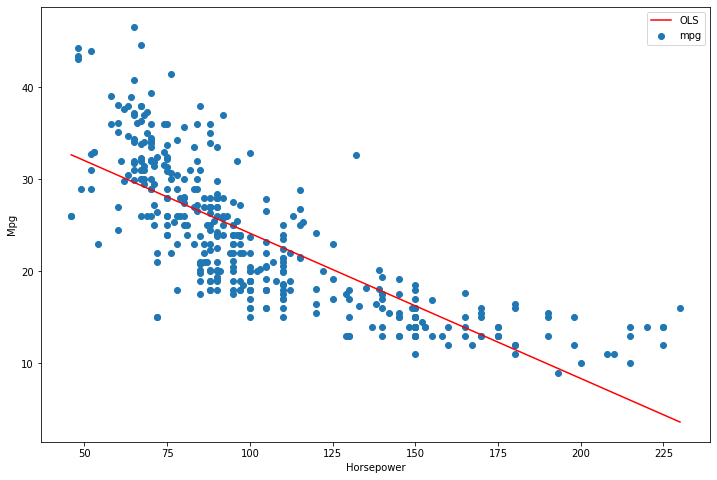

In [124]:
X = np.linspace(min(auto_df.horsepower), max(auto_df.horsepower))
X = sm.add_constant(X)
y_pred = results.predict(X)
_, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.scatter(auto_df.horsepower, auto_df.mpg, label="mpg")
ax.plot(X[:, 1], y_pred, c='r', label="OLS")
ax.set_xlabel("Horsepower")
ax.set_ylabel("Mpg")
ax.legend()

(c) Produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.
- (Standardized) residuals increase with horsepower which indicates heteroscedasticity. This means that we should have either transformed the variable or fit a nonlinear function

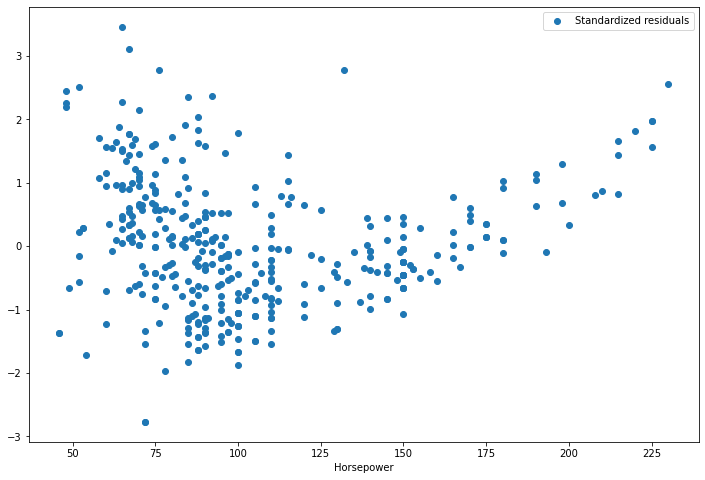

In [135]:
influence_df = results.get_influence().summary_frame()
_, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.scatter(auto_df.horsepower, influence_df.standard_resid, label="Standardized residuals")
ax.set_xlabel("Horsepower")
ax.legend()

### 9. This question involves the use of multiple linear regression on the `Auto` data set.
(a) Produce a scatterplot matrix which includes all of the variables in the data set.

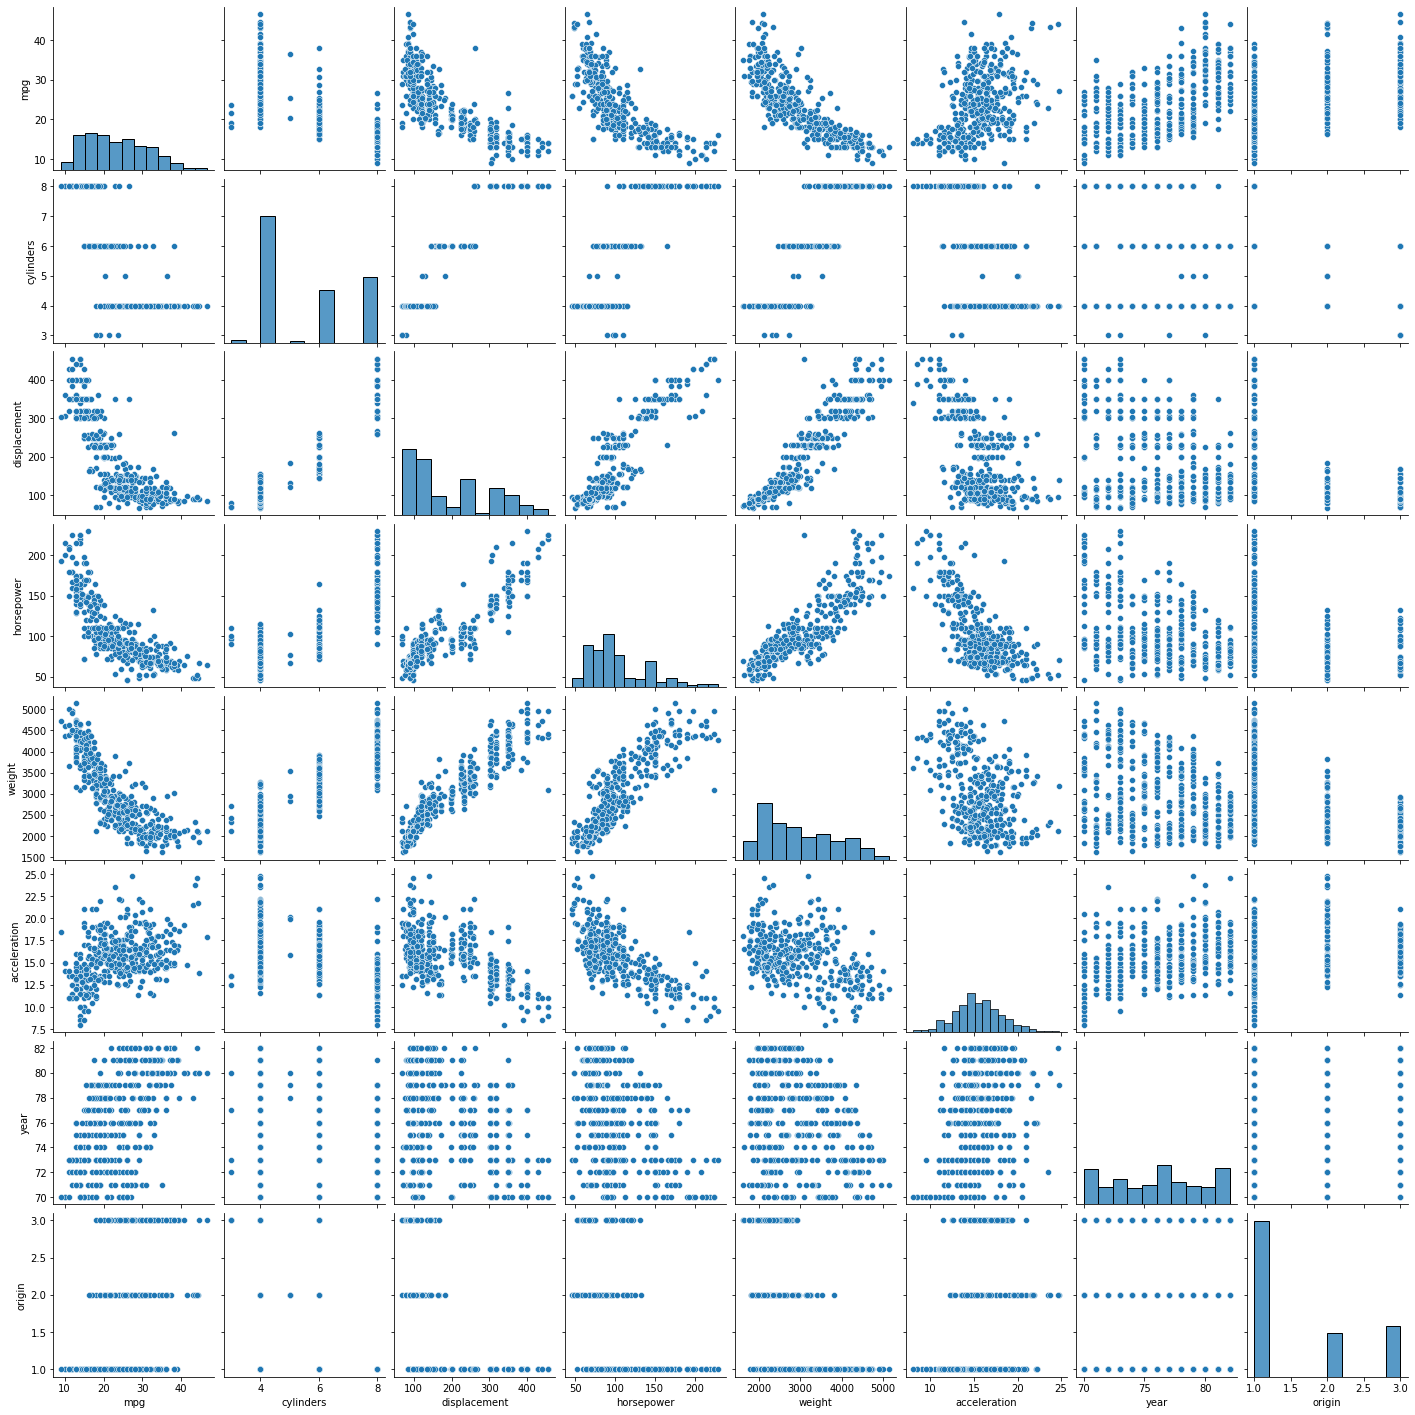

In [9]:
sns.pairplot(auto_df)

(b) Compute the matrix of correlations between the variables. You will need to exclude the `name` variable which is qualitative

In [18]:
auto_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


(c) Perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Print the results. Comment on the output

In [22]:
y = auto_df.mpg
X = auto_df[auto_df.columns.drop(["name", "mpg"])]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

In [23]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 15 Jan 2022   Prob (F-statistic):          2.04e-139
Time:                        18:22:49   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- There is a (statistically significant) relationship between the response (`mpg`) variable and `displacement, weight, year` and `origin` ($p \approx 0$). `displacement, year` and `origin` are positively correlated whereas `weight` is negatively correlated. The coefficient for the `year` variable suggests that, ceteris paribus, a unit increase in auto's manufacture year (the younger it is) results in an increase of `mpg` by `0.75`.

(d) Produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

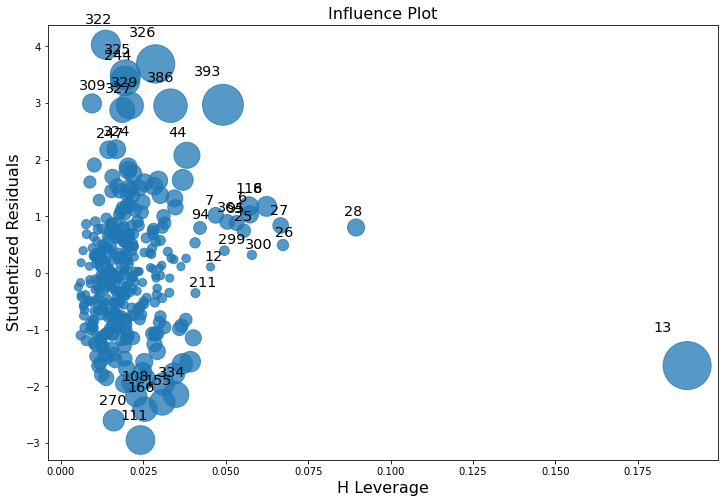

In [30]:
_, ax = plt.subplots(1, 1, figsize=(12, 8))
_ = sm.graphics.influence_plot(results, ax=ax)

- Sample `13` has a very high leverage but it's (studentized) residual isn't too big (it's not an outlier). A couple of observations can be considered outliers based on their high (studentized) residuals of above 3 - e.g. `322, 236, 325, 244`

(e) Fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [190]:
X_cols = list(auto_df.columns.drop(["mpg", "name"]))
all_interactions_str = " + ".join([f"{X_cols[i]} * {X_cols[j]}" for i in range(len(X_cols)) for j in range(i + 1, len(X_cols))])
all_terms_str = " + ".join(X_cols)
# print(f"All interactions string {all_interactions_str} \nAll terms str: {all_terms_str}")
formula = f"mpg ~ {all_terms_str} + {all_interactions_str}"
print(f"formula:\n{formula}")

results = smf.ols(formula=formula, data=auto_df).fit()
results.summary()

formula:
mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + cylinders * displacement + cylinders * horsepower + cylinders * weight + cylinders * acceleration + cylinders * year + cylinders * origin + displacement * horsepower + displacement * weight + displacement * acceleration + displacement * year + displacement * origin + horsepower * weight + horsepower * acceleration + horsepower * year + horsepower * origin + weight * acceleration + weight * year + weight * origin + acceleration * year + acceleration * origin + year * origin


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Sat, 15 Jan 2022   Prob (F-statistic):          4.01e-155
Time:                        19:21:22   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    35.4789     53.136      0.668      0.505     -69.014     139.972
cylinders                     6.9886      8.248      0.847      0.397      -9.231      23.208
displacement                 -0.4785      0.189     -2.527      0.012      -0.851      -0.106
horsepower                    0.5034      0.347      1.451      0.148      -0.179       1.186
weight                        0.0041      0.018      0.235      0.814      -0.030       0.039
acceleration                 -5.8592      2.174     -2.696      0.007     -10.134      -1.585
year                          0.6974      0.610      1.144      0.253      -0.501       1.896
origin                      -20.8956      7.097     -2.944      0.003     -34.852      -6.939
cylinders:displacement       -0.0034      0.006     -0.524      0.601      -0.016       0.009
cylinders:horsepower          0.0116      0.024      0.480      0.632      -0.036       0.059
cylinders:weight              0.0004      0.001      0.399      0.690      -0.001       0.002
cylinders:acceleration        0.2779      0.166      1.670      0.096      -0.049       0.605
cylinders:year               -0.1741      0.097     -1.793      0.074      -0.365       0.017
cylinders:origin              0.4022      0.493      0.816      0.415      -0.567       1.371
displacement:horsepower   -8.491e-05      0.000     -0.294      0.769      -0.001       0.000
displacement:weight        2.472e-05   1.47e-05      1.682      0.093   -4.18e-06    5.36e-05
displacement:acceleration    -0.0035      0.003     -1.041      0.299      -0.010       0.003
displacement:year             0.0059      0.002      2.482      0.014       0.001       0.011
displacement:origin           0.0240      0.019      1.232      0.219      -0.014       0.062
horsepower:weight         -1.968e-05   2.92e-05     -0.673      0.501   -7.72e-05    3.78e-05
horsepower:acceleration      -0.0072      0.004     -1.939      0.053      -0.015       0.000
horsepower:year              -0.0058      0.004     -1.482      0.139      -0.014       0.002
horsepower:origin             0.0022      0.029      0.076      0.939      -0.055       0.060
weight:acceleration           0.0002      0.000      1.025      0.306      -0.000       0.001
weight:year                  -0.0002      0.000     -1.056      0.292      -0.001       0.000
weight:origin                -0.0006      0.002     -0.364      0.716      -0.004       0.003
acceleration:year             0.0556      0.026      2.174      0.030       0.005       0.106
acceleration:origin           0.4583      0.157      2.926      0.004       0.150       0.766
year:origin                   0.1393      0.074      1.882      0.061      -0.006       0.285
===========================================================================

- Statistically significant interactions are: `displacement:year`, `acceleration:year` and `acceleration:origin`

(f) Try a few different transformations of the variables, such as $log(X), \sqrt{X}, X^2$. Comment on your findings.

In [200]:
results = smf.ols(formula="mpg ~ horsepower + np.power(horsepower, 2)", data=auto_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           5.40e-99
Time:                        19:30:31   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  56.9001      1.800     31.604      0.000      53.360      60.440
horsepower                 -0.4662      0.031    -14.978      0.000      -0.527      -0.405
np.power(horsepower, 2)     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

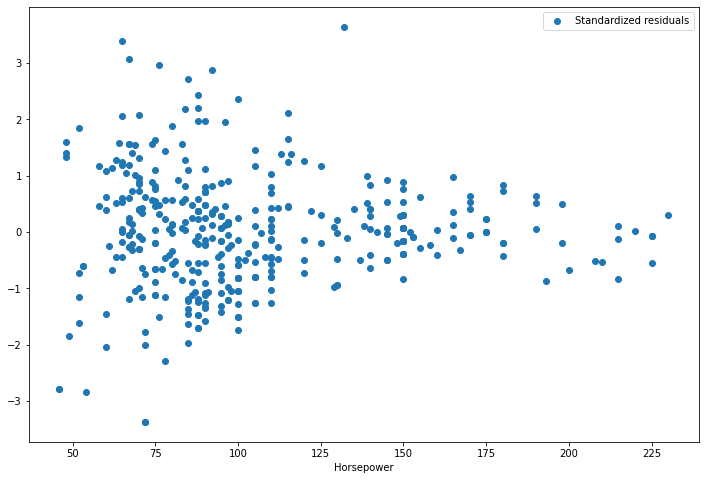

In [201]:
influence_df = results.get_influence().summary_frame()
_, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.scatter(auto_df.horsepower, influence_df.standard_resid, label="Standardized residuals")
ax.set_ylabel("Standardized Residulas")
ax.set_xlabel("Horsepower")
ax.legend()

- As we can see, introducing a nonlinear (quadratic) transformation of `Horsepower` resulted in residuals that don't have a visible pattern as previously

### 10. This question should be answered using the Carseats data set.
(a) Fit a multiple regression model to predict `Sales` using `Price, Urban`, and `US`.

In [253]:
carseats_df = pd.read_csv("../data/Carseats.csv", index_col=0)
# Encode categorical vars
carseats_df = pd.get_dummies(carseats_df, columns=["ShelveLoc", "Urban", "US"], drop_first=True)

In [260]:
y = carseats_df.Sales
X = carseats_df[["Price", "Urban_Yes", "US_Yes"]]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           2.39e-23
Time:                        18:32:47   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban_Yes     -0.0219      0.272     -0.081      0.936      -0.556       0.512
US_Yes         1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!
- Price is negatively correlated with `Sales` - every unit increase in price causes sales to drop by 0.055. For the binary variables, e.g. `Urban` we have the coefficient of `-0.02` - i.e. a presence of `Urban` decreases sales by `0.02`. Likewse, `US == True` increases the `Sales` 1.20.

Remark: If we don't encode binary variables with `drop_first = True` we will get perfectly correlated predictors (e.g. `Urban_Yes, Urban_No`). Their coefficients will match the ones computed above (`Urban_Yes = 3.40, Urban_No = 3.42` giving a diff of `0.02`) but their corresponding p-values might be both significant whereas in reality, `Urban` feature is not significant. In such case it's worth checking the Condition number (very high in case of encoding with `drop_first = False`).

(c) Write out the model in equation form, being careful to handle the qualitative variables properly.
- $y = \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3$

(d) For which of the predictors can you reject the null hypothesis $H_0 : \beta_j = 0$?
- For `Price` and `US`, based on their (low) p-value

(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [259]:
y = carseats_df.Sales
X = carseats_df[["Price", "US_Yes"]]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           2.66e-24
Time:                        18:30:13   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US_Yes         1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(f) How well do the models in (a) and (e) fit the data?
- They both have an $R^2 = 0.239$ (i.e. they don't explain the variance in data very well) which means that the predictor `Urban` was redundant

(g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).
- 95% confidence interval for `Price = [-0.065, -0.044], US = [0.692, 1.708]`

(h) Is there evidence of outliers or high leverage observations in the model from (e)?

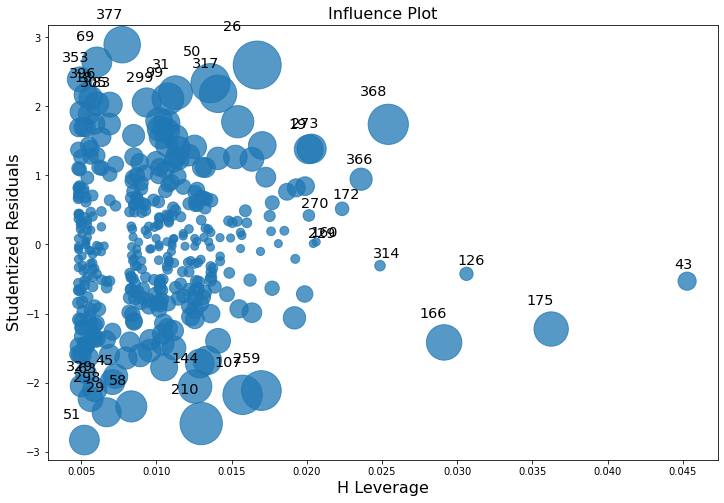

In [268]:
_, ax = plt.subplots(1, 1, figsize=(12, 8))
_ = sm.graphics.influence_plot(results, ax=ax)

- There aren't any outliers but there are points with high leverage - samples `43, 175, 126, 166`

### 11. In this problem we will investigate the t-statistic for the null hypothesis $H_0 : \beta = 0$ in simple linear regression without an intercept. To begin, we generate a predictor $x$ and a response $y$ as follows.

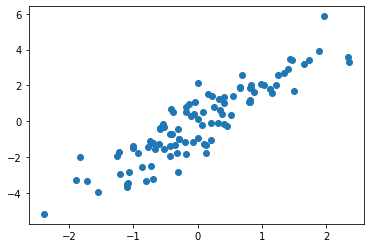

In [291]:
x = np.random.normal(size=100)
y = 2*x + np.random.normal(size=100)
plt.scatter(x, y)

In [292]:
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.813
Model:                            OLS   Adj. R-squared (uncentered):              0.812
Method:                 Least Squares   F-statistic:                              431.5
Date:                Sat, 22 Jan 2022   Prob (F-statistic):                    7.21e-38
Time:                        17:29:47   Log-Likelihood:                         -131.17
No. Observations:                 100   AIC:                                      264.3
Df Residuals:                      99   BIC:                                      266.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9930      0.096     20.773      0.000       1.803       2.183
==============================================================================
Omnibus:                        0.276   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.871   Jarque-Bera (JB):                0.453
Skew:                          -0.016   Prob(JB):                        0.797
Kurtosis:                       2.672   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(a) Perform a simple linear regression of $y$ onto $x$, without an intercept. Report the coefficient estimate $\hat{\beta}$, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis $H_0 : \beta = 0$. Comment on these results.
- $\hat{\beta} = 1.99, SE(\hat{\beta})=0.096$, p-value = 0, t-statistic = 19.36. The computed confidence interval contains the true parameter $\beta = 2$

(b) Now perform a simple linear regression of $x$ onto $y$ without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis $H_0 : \beta = 0$. Comment on these results.
- $\hat{\beta} = 0.41, SE(\hat{\beta})=0.02$, p-value = 0, t-statistic = 20.77. The computed confidence interval does not contain the true parameter $\beta = 0.5$ but based on p-value we reject the null hypothesis.

In [481]:
results = sm.OLS(x, y).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.368
Model:                            OLS   Adj. R-squared (uncentered):              0.362
Method:                 Least Squares   F-statistic:                              57.62
Date:                Sun, 23 Jan 2022   Prob (F-statistic):                    1.79e-11
Time:                        18:00:38   Log-Likelihood:                         -117.45
No. Observations:                 100   AIC:                                      236.9
Df Residuals:                      99   BIC:                                      239.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4379      0.058      7.591      0.000       0.323       0.552
==============================================================================
Omnibus:                        2.329   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.312   Jarque-Bera (JB):                1.724
Skew:                           0.232   Prob(JB):                        0.422
Kurtosis:                       3.446   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(c) What is the relationship between the results obtained in (a) and (b)?
- The t-statistic (and thus the p-value) is very similar but the estimated coefficient is not a reciprocal of the coefficient when regressing $y$ onto $x$. Discussion: https://stats.stackexchange.com/a/490128/230011 or https://stats.stackexchange.com/a/20556/230011 / https://stats.stackexchange.com/a/22721/230011

(d) For the regression of $Y$ onto $X$ without an intercept, the t-statistic for $H_0 : \beta = 0$ takes the form $\hat{\beta}/SE(\hat{\beta})$, where $\hat{\beta}$ is given by (3.38), and where
$$
SE(\hat{\beta}) = \sqrt{\frac{\sum_{i=1}^n(y_i - x_i \beta)^2}{(n-1)\sum_{i'=0}^{n}x_{i'}^2}}
$$
(These formulas are slightly different from those given in Sections 3.1.1 and 3.1.2, since here we are performing regression without an intercept.) Show algebraically, and confirm numerically that the t-statistic can be written as
$$
\frac{\sqrt{n-1}\sum_{i=1}^n x_i y_i}{\sqrt{ (\sum_{i=1}^n x_i^2 ) (\sum_{i=1}^n y_i^2 ) - (\sum_{i=1}^n x_i y_i)^2}}
$$

- Proof. Use: $\hat{\beta} = \frac{\sum x_i y_i}{\sum x_i^2} \quad (1)$ (assuming means are zero)
$$
t = \frac{\hat{\beta} - 0}{SE(\hat{\beta})} \overset{\text{general case}}{=} \
\frac{  \frac{\sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}  }{  \sqrt{\frac{\sum_{i=1}^n(y_i - x_i \hat{\beta})^2}{(n-1)\sum_{i'=0}^{n} x_{i'}^2}}  } \overset{\bar{x} = 0, \bar{y} = 0}{=} \
\frac{   \sqrt{n-1}\sqrt{\sum x_{i}^2}  \sum x_i y_i    }{   \sum x_i^2  \sqrt{\sum (y_i - x_i \hat{\beta})^2}   } = 
\frac{   \sqrt{n-1}  \sum x_i y_i    }{  \sqrt{\sum x_{i}^2}  \sqrt{\sum (y_i^2 + x_i^2 \hat{\beta}^2 - 2 x_i y_i \hat{\beta})}   } =
\frac{   \sqrt{n-1}  \sum x_i y_i    }{  \sqrt{   \sum x_{i}^2 \sum y_i^2  +  \sum x_{i}^2 x_i^2 \hat{\beta}^2  -  \sum x_{i}^2 2 x_i y_i \hat{\beta}  }} \overset{(1)}{=}
\frac{   \sqrt{n-1}  \sum x_i y_i    }{  \sqrt{   \sum x_{i}^2 \sum y_i^2  +  (\sum x_i y_i)^2 -  2 (\sum x_i y_i)^2  }} = 
\frac{   \sqrt{n-1}  \sum x_i y_i    }{  \sqrt{   \sum x_{i}^2 \sum y_i^2  -  (\sum x_i y_i)^2  }} \quad QED
$$

(e) Using the results from (d), argue that the t-statistic for the regression of $y$ onto $x$ is the same as the t-statistic for the regression of $x$ onto $y$.

- It is, due to the fact that the expression in (d) is symmetric w.r.t. $x, y$

(f) Show that when regression is performed with an intercept, the t-statistic for $H_0 : \beta = 0$ is the same for the regression of $y$ onto $x$ as it is for the regression of $x$ onto $y$
- The t-statistics are the same for the slope but not for the intercept coefficient

In [492]:
x = np.random.normal(size=100)
y = 2*x + np.random.normal(size=100)
x_2 = sm.add_constant(x)
y_2 = sm.add_constant(y)
results = sm.OLS(y, x_2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     551.5
Date:                Sun, 23 Jan 2022   Prob (F-statistic):           4.93e-42
Time:                        18:03:38   Log-Likelihood:                -138.02
No. Observations:                 100   AIC:                             280.0
Df Residuals:                      98   BIC:                             285.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1841      0.100      1.849      0.067      -0.013       0.382
x1             2.1477      0.091     23.484      0.000       1.966       2.329
==============================================================================
Omnibus:                        0.698   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.705   Jarque-Bera (JB):                0.342
Skew:                          -0.116   Prob(JB):                        0.843
Kurtosis:                       3.167   Cond. No.                         1.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [493]:
results = sm.OLS(x, y_2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     551.5
Date:                Sun, 23 Jan 2022   Prob (F-statistic):           4.93e-42
Time:                        18:03:38   Log-Likelihood:                -53.403
No. Observations:                 100   AIC:                             110.8
Df Residuals:                      98   BIC:                             116.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1087      0.042     -2.584      0.011      -0.192      -0.025
x1             0.3954      0.017     23.484      0.000       0.362       0.429
==============================================================================
Omnibus:                        2.445   Durbin-Watson:                   2.158
Prob(Omnibus):                  0.294   Jarque-Bera (JB):                1.837
Skew:                           0.238   Prob(JB):                        0.399
Kurtosis:                       3.463   Cond. No.                         2.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 12. This problem involves simple linear regression without an intercept

(a) Recall that the coefficient estimate $\hat{\beta}$ for the linear regression of $Y$ onto $X$ without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of $X$ onto $Y$ the same as the coefficient estimate for the regression of $Y$ onto $X$?
- For this to happen the slopes must be the reciprocals of each other. Since $\hat{\beta} = \frac{Cov(x, y)}{Var(x)}$ we need to have 
$\hat{\beta} \hat{\beta}_2 = 1 \overset{Cov(x,y) = Cov(y, x)}{\iff} \frac{Cov(x, y)^2}{Var(x)Var(y)} = 1$ which is only possible if all points lie on a line  due to [Cauchy-Schwatz inequality](https://en.wikipedia.org/wiki/Cauchy%E2%80%93Schwarz_inequality)

(b) Generate an example with $n = 100$ observations in which the coefficient estimate for the regression of $X$ onto $Y$ is different from the coefficient estimate for the regression of $Y$ onto $X$.
- Done in 11 (b)

(c) Generate an example with $n = 100$ observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.
 - Sufficies to remove the noise (see below)

In [540]:
x = np.random.normal(size=100)
y = x
res_y_x = sm.OLS(y, x).fit()
res_x_y = sm.OLS(x, y).fit()

In [541]:
res_y_x.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
x1,1.0000,2.03e-17,4.92e+16,0.000,1.000,1.000


In [542]:
res_x_y.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
x1,1.0000,2.03e-17,4.92e+16,0.000,1.000,1.000


### 13. In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use random seed prior to starting part (a) to ensure consistent results.

(a) Create a vector, $x$, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, $X$

In [603]:
x = np.random.normal(size=100)

(b) Create a vector, $eps$, containing 100 observations drawn from a $N(0, 0.25)$ distribution i.e. a normal distribution with mean zero and variance 0.25.

In [604]:
eps = np.random.normal(scale=np.sqrt(0.25), size=100)

(c) Using $x$ and $eps$, generate a vector $y$ according to the model $Y = −1 + 0.5X + \epsilon$. (3.39) What is the length of the vector $y$? What are the values of $\beta_0$ and $\beta_1$ in this linear model?
- Length of $y$ is 100, $\beta_0 = -1, \beta_1 = 0.5$ 

(d) Create a scatterplot displaying the relationship between $x$ and $y$. Comment on what you observe.

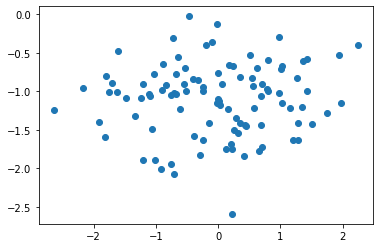

In [606]:
plt.scatter(x, y)

(e) Fit a least squares linear model to predict $y$ using $x$. Comment on the model obtained. How do $\hat{\beta}_0$ and $\hat{\beta}_1$ compare to $\beta_0$ and $\beta_1$?
- As per table below, the estimates are significant and not _much_ off. The 95% confidence interval contains true values

In [607]:
y = -1 + 0.5 * x + eps
x = sm.add_constant(x)
sm.OLS(y, x).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-1.1212,0.048,-23.311,0.000,-1.217,-1.026
x1,0.4527,0.048,9.524,0.000,0.358,0.547


(f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend command to create an appropriate legend.

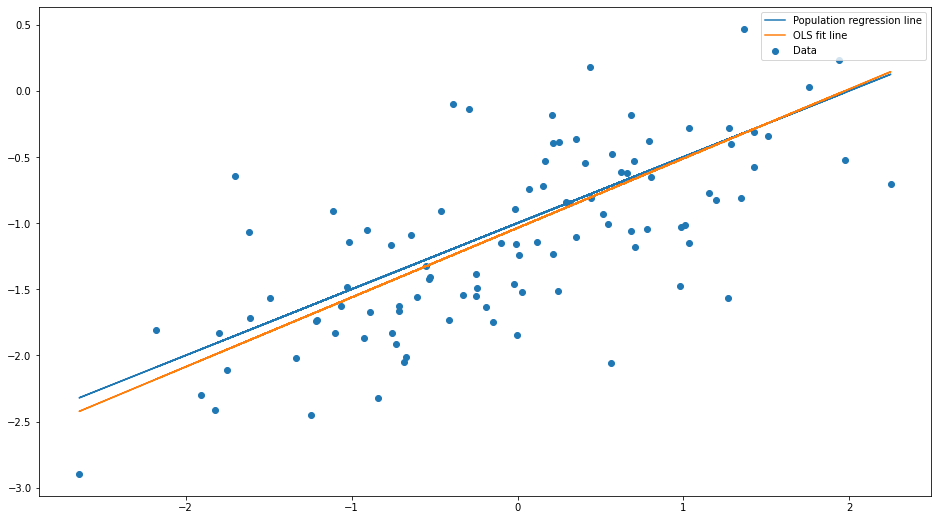

In [608]:
x = x[:, 1]
_, ax = plt.subplots(1, 1, figsize=(16, 9))
y_func_real = lambda x: -1 + 0.5 * x
y_func_fit = lambda x: -1.0366 + 0.5249 * x
ax.scatter(x, y, label="Data")
ax.plot(x, y_func_real(x), label="Population regression line")
ax.plot(x, y_func_fit(x), label="OLS fit line")
ax.legend()

(g) Now fit a polynomial regression model that predicts $y$ using $x$ and $x^2$. Is there evidence that the quadratic term improves the model fit? Explain your answer.
- As per table below, the p-value corresponding to the coefficient of the quadratic term is not significant

In [614]:
data_df = pd.DataFrame({"x": x, "y": y})
smf.ols("y ~ np.power(x, 2)", data=data_df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1.0601,0.084,-12.556,0.000,-1.228,-0.893
"np.power(x, 2)",-0.0789,0.052,-1.530,0.129,-0.181,0.023


(h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.
- As per table below the estimates of the coefficients are closer to the true values than previously. The standard error and the confidence interval are also narrower than previously

In [615]:
x = np.random.normal(size=100)
eps = np.random.normal(scale=np.sqrt(0.025), size=100)
y = -1 + 0.5 * x + eps
x = sm.add_constant(x)
sm.OLS(y, x).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-0.9932,0.015,-66.304,0.000,-1.023,-0.963
x1,0.4871,0.013,36.781,0.000,0.461,0.513


(i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results
- The estimates of the coefficients are much more off. The confidence intervals are quite wide though they still contain the true values of the parameters

In [22]:
x = np.random.normal(size=100)
eps = np.random.normal(scale=np.sqrt(2.5), size=100)
y = -1 + 0.5 * x + eps
x = sm.add_constant(x)
sm.OLS(y, x).fit().summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
const,-0.9378,0.171,-5.486,0.000,-1.277,-0.599
x1,0.2695,0.173,1.562,0.122,-0.073,0.612


(j) What are the confidence intervals for $\beta_0$ and $\beta_1$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results
- As discussed previously, the bigger the noise of $eps$ the bigger is the standard error and the wider are confidence intervals

### 14. This problem focuses on the collinearity problem
(a) Perform the following commands in R: 
```
> set.seed (1)
> x1=runif (100)
> x2=0.5* x1+rnorm (100) /10
> y=2+2* x1 +0.3* x2+rnorm (100)
```
The last line corresponds to creating a linear model in which `y` is a function of `x1` and `x2`. Write out the form of the linear model. What are the regression coefficients?
- $y = 2 + 2 x_1 + 0.3 x_2 + \epsilon \\ \beta_0 = 2, \beta_1 = 2, \beta_2 = 0.3$


In [84]:
x1 = np.random.uniform(size=100)
x2 = 0.5 * x1 + np.random.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + np.random.normal(size=100)

(b) What is the correlation between `x1` and `x2`? Create a scatterplot displaying the relationship between the variables

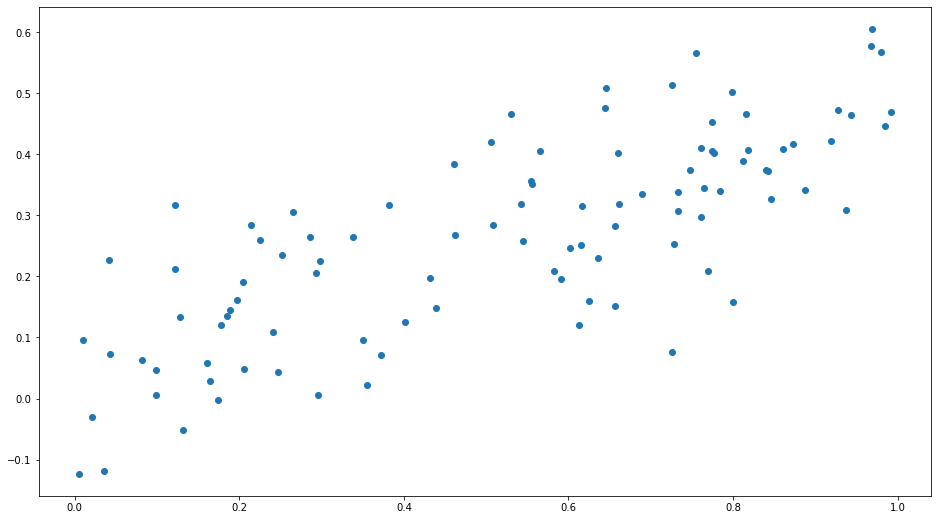

In [85]:
_, ax = plt.subplots(1, 1, figsize=(16, 9))
ax.scatter(x1, x2)

(c) Using this data, fit a least squares regression to predict `y` using `x1` and `x2`. Describe the results obtained. What are $\beta_0$, $\beta_1$, and $\beta_2$? How do these relate to the true $\beta_0$, $\beta_1$, and $\beta_2$? Can you reject the null hypothesis $H_0 : \beta_1 = 0$? How about the null hypothesis $H_0 : \beta_2 = 0$?

In [87]:
X = np.hstack([sm.add_constant(x1), x2.reshape(-1, 1)])
sm.OLS(y, X).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,2.0679,0.215,9.613,0.000,1.641,2.495
x1,1.6345,0.555,2.944,0.004,0.532,2.737
x2,1.0135,0.985,1.029,0.306,-0.942,2.969


- You can reject the first hypothesis but not the second - the confidence interval for $\beta_2$ contains 0 so the null hypothesis cannnot be rejected

(d) Now fit a least squares regression to predict `y` using only `x1`. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1 = 0$?
- Yes, this hypothesis can be rejected

In [53]:
sm.OLS(y, sm.add_constant(x1)).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,2.1473,0.217,9.907,0.000,1.717,2.577
x1,2.0778,0.350,5.931,0.000,1.383,2.773


(e) Now fit a least squares regression to predict `y` using only `x2`. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1 = 0$?
- The hypothesis can be rejected:

In [88]:
sm.OLS(y, sm.add_constant(x2)).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,2.3314,0.203,11.478,0.000,1.928,2.734
x1,3.2424,0.654,4.954,0.000,1.944,4.541


(f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.
- No. `x1` and `x2` are themselves correlated. In the absence of one, their relationship with `y` is significant. But when both are used, the other one becomes redundant/insignificant as only one is sufficient to explain the variability in data.

(g) Now suppose we obtain one additional observation, which was unfortunately mismeasured.
```
> x1=c(x1 , 0.1)
> x2=c(x2 , 0.8)
> y=c(y ,6)
```
Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

In [89]:
x1_new = np.append(x1, np.asarray([0.1]))
x2_new = np.append(x2, np.asarray([0.8]))
y_new = np.append(y, np.asarray([6]))

In [90]:
res = sm.OLS(y_new, sm.add_constant(x1_new)).fit().summary().tables[1]
res

,coef,std err,t,P>|t|,[0.025,0.975]
const,2.2362,0.220,10.145,0.000,1.799,2.674
x1,1.8936,0.371,5.097,0.000,1.157,2.631


In [91]:
X_new = np.hstack([sm.add_constant(x1_new), x2_new.reshape(-1, 1)])
sm.OLS(y_new, X_new).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,2.0895,0.220,9.506,0.000,1.653,2.526
x1,0.9737,0.489,1.990,0.049,0.003,1.945
x2,2.3106,0.834,2.771,0.007,0.656,3.965


In [92]:
sm.OLS(y_new, x1_new).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
x1,5.1784,0.259,20.010,0.000,4.665,5.692


In [93]:
sm.OLS(y_new, x2_new).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
x1,9.5011,0.507,18.728,0.000,8.495,10.508


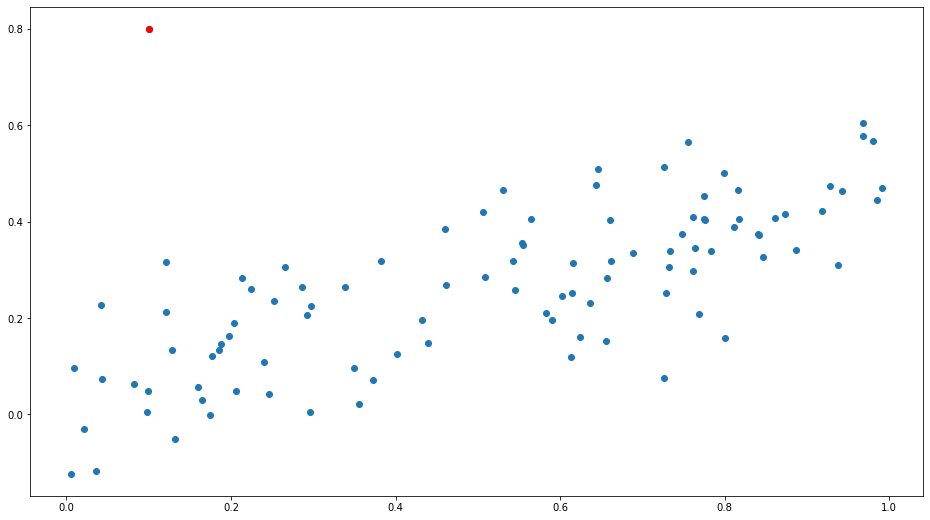

In [96]:
_, ax_new = plt.subplots(1, 1, figsize=(16, 9))
ax_new.scatter(x1_new, x2_new)
ax_new.scatter(np.asarray([0.1]), np.asarray([0.8]), c='r')

In [105]:
X_new = np.hstack([sm.add_constant(x1_new), x2_new.reshape(-1, 1)])
new_result = sm.OLS(y_new, X_new).fit()

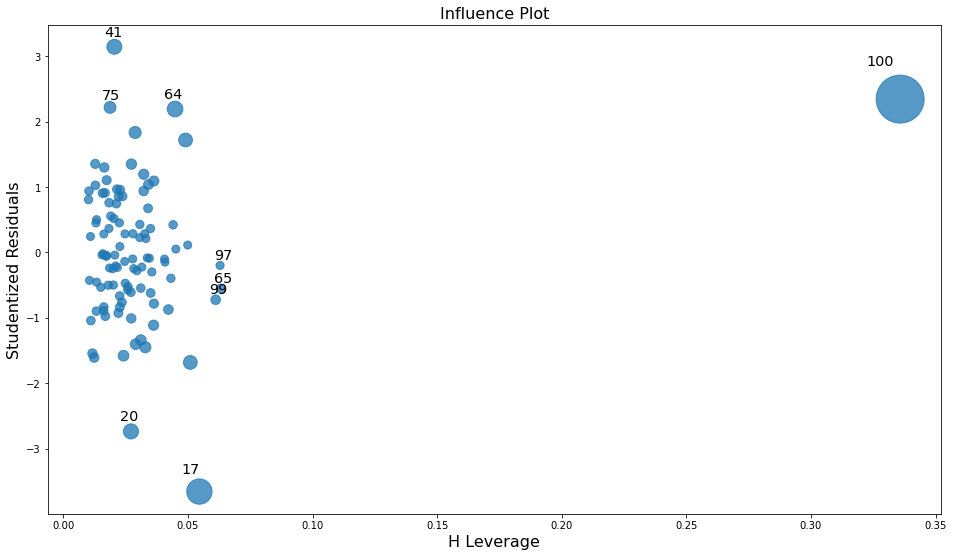

In [106]:
_, ax_influence = plt.subplots(1, 1, figsize=(16, 9))
_ = sm.graphics.influence_plot(new_result, ax=ax_influence)

- The new observation has both high leverage and high stundentized residual so it's both a high leverage point as well as an outlier.

### 15. This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors
(a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

In [109]:
boston_df = pd.read_csv("../data/Boston.csv", index_col=0)

In [145]:
y_boston = boston_df.index.values
coeffs_simple_reg = []
for col in boston_df.columns:
    res = sm.OLS(y_boston, sm.add_constant(boston_df[col]).values).fit()
    confidence_interval = res.conf_int()
    coeff = res.params
    # coeff[0] corresponds to interception term
    coeffs_simple_reg.append(coeff[1])
    print(f"OLS coeff for feature {col}:{coeff[1]}, confidence interval: {[confidence_interval[1]]}")

OLS coeff for feature zn:-0.07393497740412347, confidence interval: [array([-0.10555574, -0.04231421])]
OLS coeff for feature indus:0.5097763311042314, confidence interval: [array([0.40952974, 0.61002292])]
OLS coeff for feature chas:-1.8927765508037597, confidence interval: [array([-4.85181454,  1.06626143])]
OLS coeff for feature nox:31.24853120112292, confidence interval: [array([25.35607584, 37.14098657])]
OLS coeff for feature rm:-2.6840512241139476, confidence interval: [array([-3.72934277, -1.63875968])]
OLS coeff for feature age:0.10778622713953306, confidence interval: [array([0.08276318, 0.13280927])]
OLS coeff for feature dis:-1.5509016824100992, confidence interval: [array([-1.88161666, -1.2201867 ])]
OLS coeff for feature rad:0.6179109273272012, confidence interval: [array([0.55045982, 0.68536204])]
OLS coeff for feature tax:0.029742252822765353, confidence interval: [array([0.02611267, 0.03337184])]
OLS coeff for feature ptratio:1.151982787070586, confidence interval: [ar

- We can reject the null hypothesis for all predictors but `chas`

(b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis $H_0 : \beta_j = 0$?

In [127]:
sm.OLS(y_boston, sm.add_constant(boston_df).values).fit().summary().tables[1]

/Users/tomasz_bartkowiak/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,coef,std err,t,P>|t|,[0.025,0.975]
const,17.0332,7.235,2.354,0.019,2.818,31.248
x1,0.0449,0.019,2.394,0.017,0.008,0.082
x2,-0.0639,0.083,-0.766,0.444,-0.228,0.100
x3,-0.7491,1.180,-0.635,0.526,-3.068,1.570
x4,-10.3135,5.276,-1.955,0.051,-20.679,0.052
x5,0.4301,0.613,0.702,0.483,-0.774,1.634
x6,0.0015,0.018,0.081,0.935,-0.034,0.037
x7,-0.9872,0.282,-3.503,0.001,-1.541,-0.433
x8,0.5882,0.088,6.680,0.000,0.415,0.761
x9,-0.0038,0.005,-0.733,0.464,-0.014,0.006


- We can now reject predictors: 2, 3, 4, 5, 6, 9, 10, 11, 12:

In [129]:
idxs = np.asarray([2, 3, 4, 5, 6, 9, 10, 11, 12])
boston_df.columns[idxs - 1]

Index(['indus', 'chas', 'nox', 'rm', 'age', 'tax', 'ptratio', 'black',
       'lstat'],
      dtype='object')

(c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis

In [147]:
res_multiple_reg = sm.OLS(y_boston, sm.add_constant(boston_df.values)).fit()
res_multiple_reg.params

array([ 1.70332275e+01,  4.48552147e-02, -6.38548236e-02, -7.49133611e-01,
       -1.03135349e+01,  4.30130506e-01,  1.45164344e-03, -9.87175726e-01,
        5.88208591e-01, -3.78001638e-03, -2.71080558e-01, -7.53750489e-03,
        1.26211376e-01, -1.98886821e-01])

Text(0, 0.5, 'Coefficient from multiple regreesion')

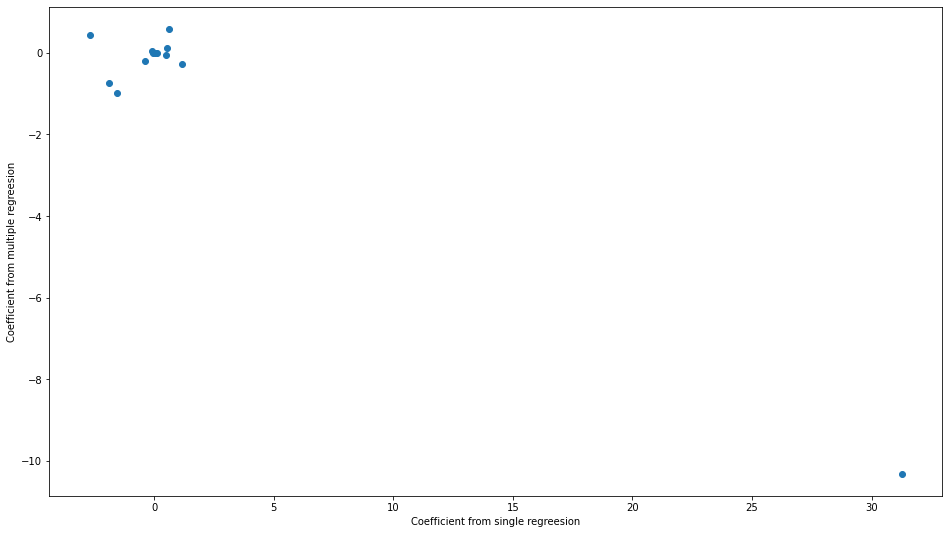

In [154]:
_, ax = plt.subplots(1, 1, figsize=(16, 9))
ax.scatter(coeffs_simple_reg, res_multiple_reg.params[1:])
ax.set_xlabel("Coefficient from single regreesion")
ax.set_ylabel("Coefficient from multiple regreesion")

(d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor $X$, fit a model of the form:
$$
Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon
$$

In [159]:
for col in boston_df.columns:
    X = sm.add_constant(boston_df[col])
    results = smf.ols(formula=f"crim ~ {col} + np.power({col}, 2) + np.power({col}, 3)", data=boston_df.reset_index()).fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           1.28e-06
Time:                        16:58:19   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.8461      0.433     

/Users/tomasz_bartkowiak/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/tomasz_bartkowiak/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/tomasz_bartkowiak/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/tomasz_bartkowiak/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::ord

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     121.3
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           4.45e-59
Time:                        16:58:20   Log-Likelihood:                -1668.5
No. Observations:                 506   AIC:                             3345.
Df Residuals:                     502   BIC:                             3362.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            53.1655      3.35

- Evidence for nonlinear association of predictor to response can be found for predictors: indus, nox, age, dis, ptratio, medv